In [1]:
import sys

import importlib
sys.path.append('../src')
sys.path.append("../legacy")

from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from zadu import zadu
from zaduvis import zaduvis

importlib.reload(zadu)
importlib.reload(zaduvis)




<module 'zaduvis.zaduvis' from '../src/zaduvis/zaduvis.py'>

### Dataset Generation

In [2]:
digits, digits_label = load_digits(return_X_y=True)
iris, iris_label = load_iris(return_X_y=True)

pca = PCA(n_components=2)

digits_pca = pca.fit_transform(digits)
iris_pca = pca.fit_transform(iris)

digits_tsne = TSNE(n_components=2).fit_transform(digits)
iris_tsne = TSNE(n_components=2).fit_transform(iris)


/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Running ZADU

In [5]:
spec_list = [
  {
    "measure": "tnc",
    "params": {
			"k": 25
		}
	},
  {
    "measure": "ca_tnc",
		"params": {
			"k": 30
		}       
	},
  {
    "measure": "dtm"
	},
  {
    "measure": "neighbor_dissimilarity",
    "params": {
			"k": 50
		}
	}
]

specs = {
    "tnc": { "k": 25 },
    "ca_tnc": { "k": 30 },
    "dtm": {},
    "neighbor_dissimilarity": { "k": 50 }
}

zadu_obj = zadu.ZADU(specs, return_local=True)
scores, local_list = zadu_obj.run(digits, digits_pca, digits_label)

trust_conti_local = local_list[0]
trust_conti_local

{'local_trustworthiness': array([0.97146106, 0.93023309, 0.57544059, ..., 0.5547925 , 0.76322911,
        0.56495736]),
 'local_continuity': array([0.98778852, 0.97791927, 0.90105742, ..., 0.90089824, 0.90476407,
        0.84964184])}

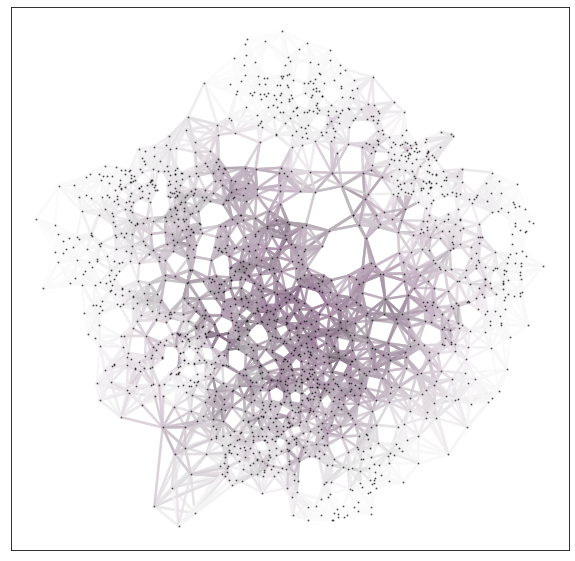

In [6]:
zaduvis.reliability_map(digits_pca, trust_conti_local["local_trustworthiness"], trust_conti_local["local_continuity"], k=10)

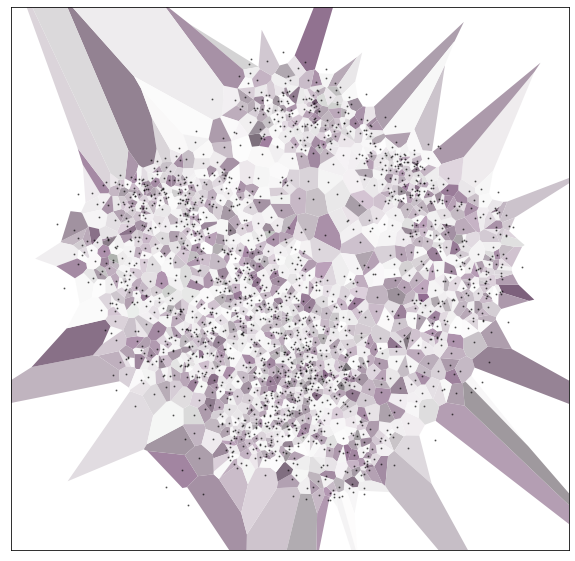

In [7]:
zaduvis.checkviz(digits_pca, trust_conti_local["local_trustworthiness"], trust_conti_local["local_continuity"])